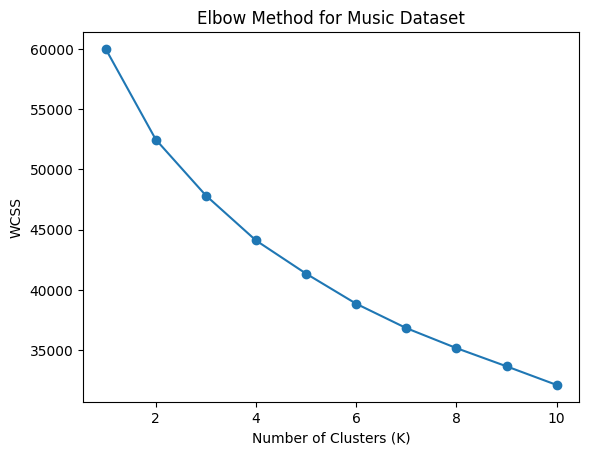


Cluster Summary:
          danceability    energy   valence       tempo    duration_ms  \
cluster                                                                
0            0.492972  0.549324  0.226217  130.740332  279436.205871   
1            0.507455  0.509729  0.502357   90.840675  137908.785919   
2            0.489362  0.490030  0.509432  167.909610  140879.023714   
3            0.487105  0.467202  0.774238  129.043923  280801.822984   

         popularity  
cluster              
0         51.237930  
1         52.377405  
2         45.972669  
3         51.354435  

Sample Data with Clusters:

        track_name      artist  cluster       cluster_name
0         Love Sky  Artist_464        3     Mainstream Mix
1       Fire Dream  Artist_221        0  High Energy Party
2      Light Night  Artist_357        2        Chill / Sad
3  Love Wave Night  Artist_389        1      Happy / Dance
4       Fire Light  Artist_451        0  High Energy Party

Cluster Distribution:

cluster
0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
# -------------------- LOAD DATA --------------------
df = pd.read_csv("spotify.csv")   # change filename if needed
 
# -------------------- SELECT NUMERIC FEATURES --------------------
features = df[['danceability', 'energy', 'valence',
               'tempo', 'duration_ms', 'popularity']]
 
# -------------------- HANDLE MISSING VALUES --------------------
features = features.fillna(features.mean())
 
# -------------------- SCALE DATA --------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
 
# -------------------- ELBOW METHOD --------------------
wcss = []
 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
 
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Music Dataset")
plt.show()
 
# -------------------- APPLY KMEANS --------------------
k = 4  # choose based on elbow graph
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)
 
# -------------------- CLUSTER SUMMARY --------------------
cluster_summary = df.groupby('cluster')[features.columns].mean()
print("\nCluster Summary:\n", cluster_summary)
 
# -------------------- OPTIONAL: CLUSTER NAMES --------------------
cluster_names = {
    0: "High Energy Party",
    1: "Happy / Dance",
    2: "Chill / Sad",
    3: "Mainstream Mix"
}
 
df['cluster_name'] = df['cluster'].map(cluster_names)
 
# -------------------- FINAL OUTPUT --------------------
print("\nSample Data with Clusters:\n")
print(df[['track_name', 'artist', 'cluster', 'cluster_name']].head())
 
print("\nCluster Distribution:\n")
print(df['cluster'].value_counts())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline


In [3]:
df = pd.read_csv("spotify.csv")


In [4]:
FEATURE_COLS = [
    'danceability',
    'energy',
    'valence',
    'tempo',
    'duration_ms',
    'popularity'
]

X = df[FEATURE_COLS]


In [5]:
X = X.fillna(X.mean())


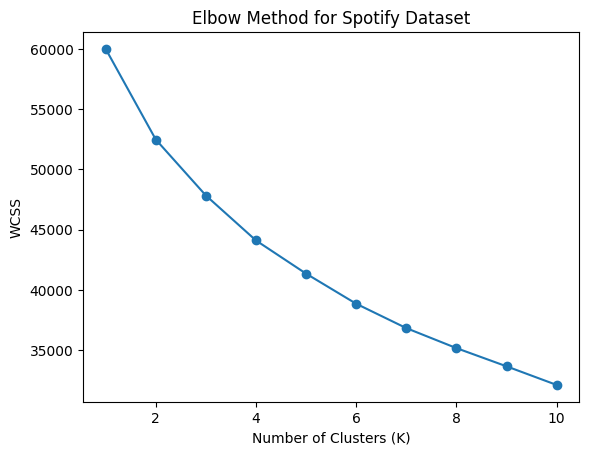

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Spotify Dataset")
plt.show()


In [7]:
k = 4

kmeans_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=k, random_state=42, n_init=10))
])


In [8]:
df["cluster"] = kmeans_pipeline.fit_predict(X)


In [9]:
joblib.dump(kmeans_pipeline, "spotify_kmeans_pipeline.pkl")
print("✅ Model saved as spotify_kmeans_pipeline.pkl")


✅ Model saved as spotify_kmeans_pipeline.pkl


In [10]:
cluster_summary = df.groupby("cluster")[FEATURE_COLS].mean()
print("\nCluster Summary:\n", cluster_summary)



Cluster Summary:
          danceability    energy   valence       tempo    duration_ms  \
cluster                                                                
0            0.492972  0.549324  0.226217  130.740332  279436.205871   
1            0.507455  0.509729  0.502357   90.840675  137908.785919   
2            0.489362  0.490030  0.509432  167.909610  140879.023714   
3            0.487105  0.467202  0.774238  129.043923  280801.822984   

         popularity  
cluster              
0         51.237930  
1         52.377405  
2         45.972669  
3         51.354435  


In [11]:
cluster_names = {
    0: "High Energy Party",
    1: "Happy / Dance",
    2: "Chill / Sad",
    3: "Mainstream Mix"
}

df["cluster_name"] = df["cluster"].map(cluster_names)


In [12]:
print("\nSample Songs with Clusters:\n")
print(df[['track_name', 'artist', 'cluster', 'cluster_name']].head())

print("\nCluster Distribution:\n")
print(df['cluster'].value_counts())



Sample Songs with Clusters:

        track_name      artist  cluster       cluster_name
0         Love Sky  Artist_464        3     Mainstream Mix
1       Fire Dream  Artist_221        0  High Energy Party
2      Light Night  Artist_357        2        Chill / Sad
3  Love Wave Night  Artist_389        1      Happy / Dance
4       Fire Light  Artist_451        0  High Energy Party

Cluster Distribution:

cluster
0    2589
2    2488
3    2480
1    2443
Name: count, dtype: int64


In [13]:
# Load trained pipeline
model = joblib.load("spotify_kmeans_pipeline.pkl")

# Example new song
new_song = pd.DataFrame([{
    "danceability": 0.8,
    "energy": 0.9,
    "valence": 0.7,
    "tempo": 120,
    "duration_ms": 210000,
    "popularity": 85
}])

pred_cluster = model.predict(new_song)
print("Predicted Cluster:", pred_cluster[0])


Predicted Cluster: 3
